In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_binning/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.18/04


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_weighted.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Cross section for single differnetial in Momentum (no sys)

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_binning.root","RECREATE");

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'NuCCana_overlay_V26_mar18.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	1012051
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.26811760704e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.0060278320856
Dirt:		0.0611423668132


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4_noflux.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	1013969
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')

energy_cut = ' && MCle_Energy>0.15'

numu_signal = numu_signal+energy_cut
numu_true = numu_true+energy_cut
numu_nomu = numu_nomu+energy_cut
numu_lowpur = numu_lowpur+energy_cut
numu_nc = numu_nc+energy_cut
numu_ov = numu_ov+energy_cut
numu_other = numu_other+energy_cut
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [12]:

track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [13]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

In [14]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [15]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [16]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

In [17]:
def RosenBrock(xx):
    x = xx[0];
    y = xx[1];
    tmp1 = y-x*x;
    tmp2 = 1-x;
    return 100*tmp1*tmp1+tmp2*tmp2;

In [147]:

def get_n_data_momentum(xx):
    h_reco = ROOT.TH1F("h_reco",'Truth vs. Reco',100,0,2.5)
    h_reco_r = ROOT.TH1F("h_reco_r",'Truth vs. Reco',100,0,2.5)
    this_cut = weight_name+'*('+cut+' && track_end_uncontained)'
    this_cut_r = weight_name+'*('+cut+' && !track_end_uncontained)'
    energy_cut_ = ' && TrackMomMCS_mom<'+str(xx[0])+' && TrackMomMCS_mom>'+str(bin_start)
    energy_cut_r = ' && TrackMomRange_mu<'+str(xx[0])+' && TrackMomRange_mu>'+str(bin_start)

    globale.data_out.Draw('TrackMomMCS_mom'+'>>h_reco',this_cut+energy_cut_,'')
    globale.data_out.Draw('TrackMomRange_mu'+'>>h_reco_r',this_cut_r+energy_cut_r,'')
    h_reco.Add(h_reco_r)
    
    return h_reco.GetEntries()

def bin_border_momentum(xx):
    #print xx[0]
    h_reco = ROOT.TH1F("h_reco",'Truth vs. Reco',100,0,2.5)
    h_reco_r = ROOT.TH1F("h_reco_r",'Truth vs. Reco',100,0,2.5)
    this_cut = weight_name+'*('+cut+'&& numu_signal && track_end_uncontained)'
    this_cut_r = weight_name+'*('+cut+'&& numu_signal && !track_end_uncontained)'
    energy_cut_ = ' && TrackMomMCS_mom<'+str(xx[0])+' && TrackMomMCS_mom>'+str(bin_start)
    energy_cut_r = ' && TrackMomRange_mu<'+str(xx[0])+' && TrackMomRange_mu>'+str(bin_start)

    globale.overlay_out.Draw('MCle_Energy'+'>>h_reco',this_cut+energy_cut_,'')
    globale.overlay_out.Draw('MCle_Energy'+'>>h_reco_r',this_cut_r+energy_cut_r,'')
    h_reco.Add(h_reco_r)

    f1 = ROOT.TF1("f1","gaus",0,2.5)
    h_reco.Fit("f1","R");
    mean_eventrate  = f1.GetParameter(2)
    punish = 0.0
    #if mean_eventrate == 0:
    #    punish += 1
    n_data = get_n_data_momentum(xx)
    if n_data<100:
        punish+=10/(n_data+1e-1)
    print 'BinBorder: ',xx[0], 'difference', abs(abs(xx[0]-bin_start) - 2*mean_eventrate),'punish: ', punish,' n_data ',n_data

    return abs(abs(xx[0]-bin_start) - 2*mean_eventrate)+punish

In [148]:

def get_n_data_theta(xx):
    h_reco = ROOT.TH1F("h_reco",'Truth vs. Reco',100,-1,1)
    #h_reco_r = ROOT.TH1F("h_reco_r",'Truth vs. Reco',100,0,2.5)
    this_cut = weight_name+'*('+cut+')'
    #this_cut_r = weight_name+'*('+cut+' && !track_end_uncontained)'
    theta_cut_ = ' && cos(TrackTheta)>'+str(xx[0])+' && cos(TrackTheta)<'+str(bin_end)
    #energy_cut_r = ' && TrackMomRange_mu<'+str(xx[0])+' && TrackMomRange_mu>'+str(bin_start)

    globale.data_out.Draw('cos(TrackTheta)'+'>>h_reco',this_cut+theta_cut_,'')
    #globale.data_out.Draw('TrackMomRange_mu'+'>>h_reco_r',this_cut_r+energy_cut_r,'')
    #h_reco.Add(h_reco_r)
    
    return h_reco.GetEntries()

def bin_border_theta(xx):
    #print xx[0]
    h_reco = ROOT.TH1F("h_reco",'Truth vs. Reco',100,-1,1)
    #h_reco_r = ROOT.TH1F("h_reco_r",'Truth vs. Reco',100,0,2.5)
    this_cut = weight_name+'*('+cut+'&& numu_signal)'
    #this_cut_r = weight_name+'*('+cut+'&& numu_signal && !track_end_uncontained)'
    energy_cut_ = ' && cos(TrackTheta)>'+str(xx[0])+' && cos(TrackTheta)<'+str(bin_end)
    #energy_cut_r = ' && TrackMomRange_mu<'+str(xx[0])+' && TrackMomRange_mu>'+str(bin_start)

    globale.overlay_out.Draw('cos(MCNu_leptonTheta)'+'>>h_reco',this_cut+energy_cut_,'')
    #globale.overlay_out.Draw('MCle_Energy'+'>>h_reco_r',this_cut_r+energy_cut_r,'')
    h_reco.Add(h_reco_r)

    f1 = ROOT.TF1("f1","gaus",-1,1)
    h_reco.Fit("f1","R");
    mean_eventrate  = f1.GetParameter(2)
    punish = 0.0
    #if mean_eventrate == 0:
    #    punish += 1
    n_data = get_n_data_theta(xx)
    if n_data<100:
        punish+=10/(n_data+1e-2)
    print 'BinBorder: ',xx[0], 'difference', abs(abs(xx[0]-bin_end) - 2*mean_eventrate),'punish: ', punish,' n_data ',n_data

    return (abs(abs(xx[0]-bin_end) - 2*mean_eventrate)+punish)

In [149]:
from scipy.optimize import minimize

x0 = [-1.0]
bin_end = -0.3

#res = minimize(bin_border_theta, x0, method='Nelder-Mead', tol=1e-3, options={'maxiter':100})
res.x

array([-0.90078125])

In [153]:
from scipy.optimize import minimize

x0 = [0.6]
bin_start = 0.33

res = minimize(bin_border, x0, method='Nelder-Mead', tol=1e-3, options={'maxiter':100})
res.x

BinBorder:  0.6 difference 0.06786471902823343 punish:  0.0  n_data  504.0
BinBorder:  0.63 difference 0.08092279830676605 punish:  0.0  n_data  542.0
BinBorder:  0.57 difference 0.05591850173763033 punish:  0.0  n_data  449.0
BinBorder:  0.5399999999999998 difference 0.043490622761965636 punish:  0.0  n_data  395.0
BinBorder:  0.47999999999999965 difference 0.024197358380533718 punish:  0.0  n_data  286.0
BinBorder:  0.4199999999999995 difference 0.007996256576579736 punish:  0.0  n_data  184.0
BinBorder:  0.29999999999999916 difference 0.03000000000000086 punish:  10.0  n_data  0.0
BinBorder:  0.47999999999999965 difference 0.024197358380533718 punish:  0.0  n_data  286.0
BinBorder:  0.3599999999999993 difference 0.009652695171253015 punish:  0.0161030595813  n_data  62.0
BinBorder:  0.44999999999999957 difference 0.015394750203532592 punish:  0.0  n_data  230.0
BinBorder:  0.3899999999999994 difference 0.00012096876058229067 punish:  0.0  n_data  119.0
BinBorder:  0.3599999999999993

array([0.39])

 FCN=6458.89 FROM MIGRAD    STATUS=CONVERGED     100 CALLS         101 TOTAL
                     EDM=3.26359e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.57283e+03   2.38192e+01   2.45684e-01  -1.19631e-05
   2  Mean         4.90194e-01   6.29560e-04  -6.80400e-06   1.68717e+00
   3  Sigma        1.01068e-01   4.21301e-04  -1.98685e-06  -1.43622e+00
 FCN=7090.36 FROM MIGRAD    STATUS=CONVERGED     109 CALLS         110 TOTAL
                     EDM=1.08836e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.63623e+03   2.30604e+01   7.48511e-01   4.81736e-05
   2  Mean         5.07242e-01   6.57461e-04   2.26126e-05   8.30246e-01
   3  Sigma        1

Warning in <TFile::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_reco_r (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_reco_r (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_reco_r (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_reco_r (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_reco_r (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_reco_r (Pote

In [21]:
dfesg

NameError: name 'dfesg' is not defined

fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1


175551

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_binning/root/h2_true_MCS.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_binning/png/h2_true_MCS.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_binning/pdf/h2_true_MCS.pdf has been created


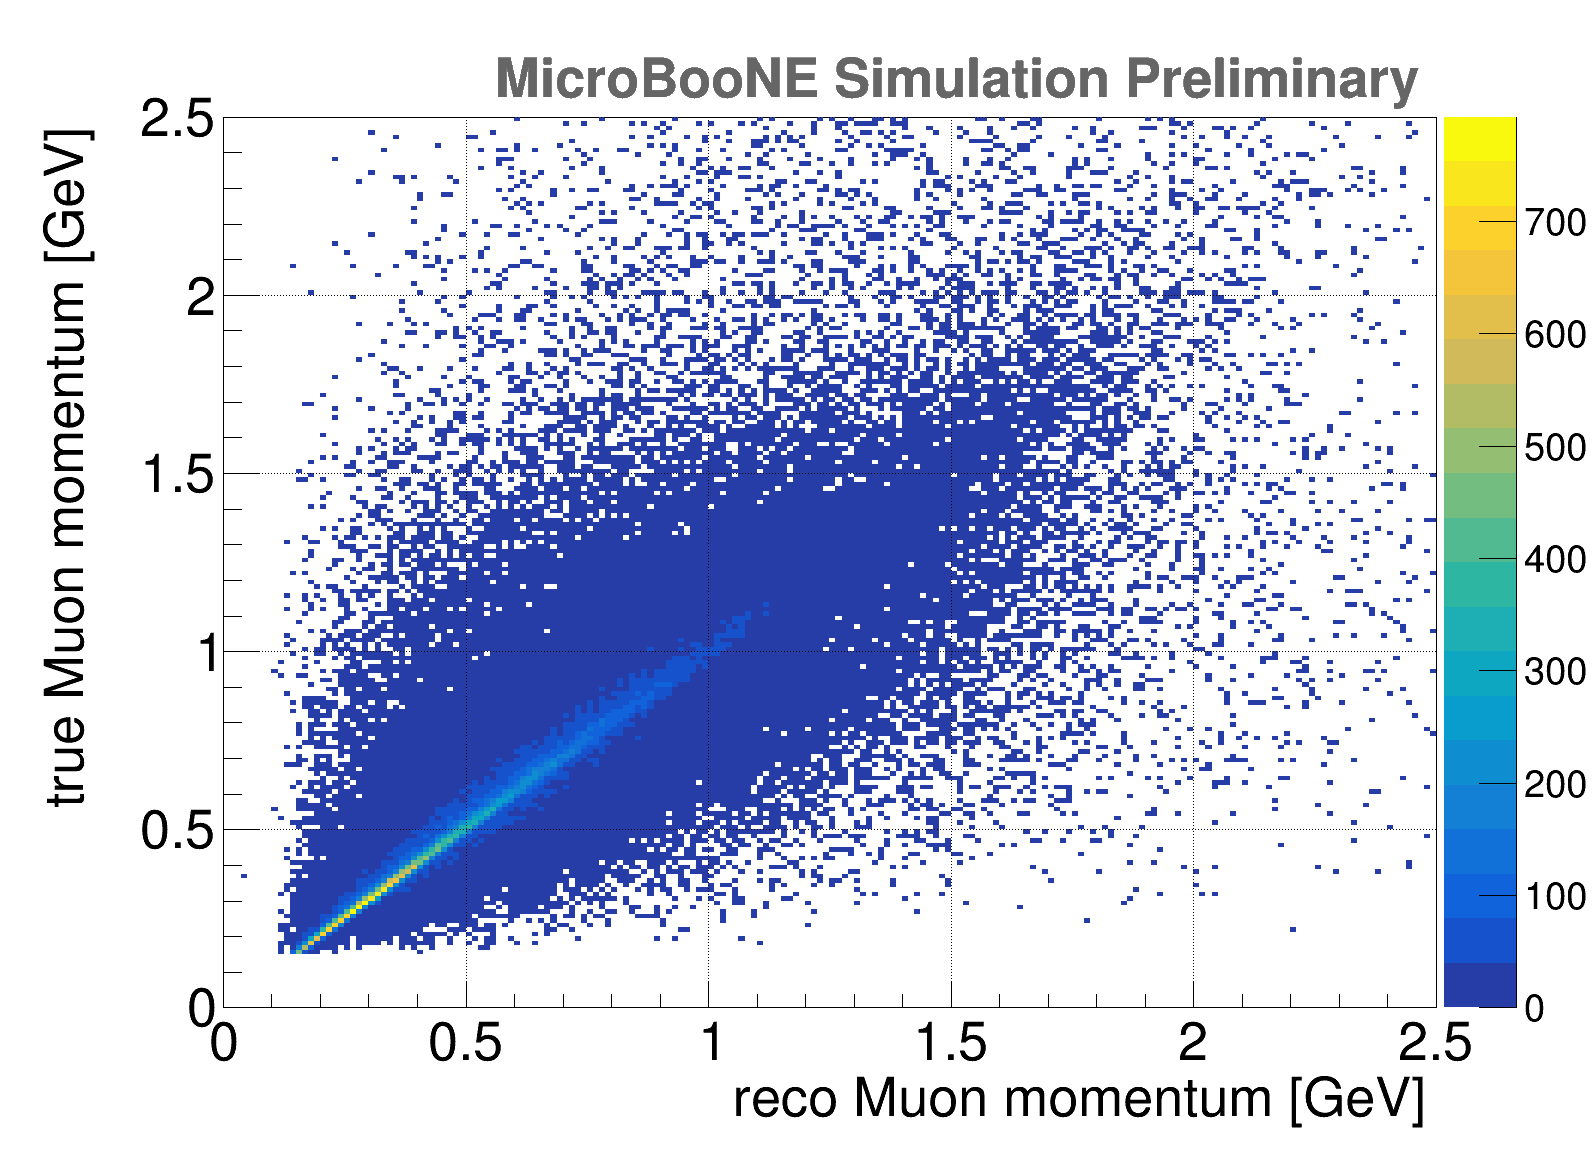

In [60]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
h_migration_r = ROOT.TH2F("h_migration_r",'Truth vs. Reco',200,0,2.5,200,0,2.5)
print cut
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_signal && track_end_uncontained)','')
globale.overlay_out.Draw('MCle_Energy:TrackMomRange_mu'+'>>h_migration_r',weight_name+'*('+cut+'&& numu_signal && !track_end_uncontained)','')
h_migration.Add(h_migration_r)
h_migration.SetXTitle("reco Muon momentum [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
h_migration.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_MCS.pdf")
h_migration.Write("h2_true_MCS_fine")

In [ ]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
h_migration_r = ROOT.TH2F("h_migration_r",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_signal && track_end_uncontained)','')
globale.overlay_out.Draw('MCle_Energy:TrackMomRange_mu'+'>>h_migration_r',weight_name+'*('+cut+'&& numu_signal && !track_end_uncontained)','')
#globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*(numu_signal)','')
h_migration.Add(h_migration_r)
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.0f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS_bin.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_MCS_bin.pdf")
h_migration.Write("h2_true_MCS_bin")

In [ ]:
# close the root file with all the histos
RootFile.Close()